# Analyze EvoGFuzz

In [94]:
from evogfuzz_formalizations.calculator import GRAMMAR, INITIAL_INPUTS, prop

In [95]:
from evogfuzz import EvoGFuzz

In [96]:
from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(
    level=logging.DEBUG,
    format="%(asctime)s:  %(message)s"
)

evogfuzz = EvoGFuzz(
    grammar=GRAMMAR,
    inputs=INITIAL_INPUTS,
    prop=prop
)

In [97]:
result = evogfuzz.execute()

2023-01-11 15:24:04,027:  Fuzzing with EvoGFuzz
2023-01-11 15:24:04,028:  Executing input files
2023-01-11 15:24:04,029:  exec: [False, False, False, False]
2023-01-11 15:24:04,029:  inp: {'sqrt(28367)', 'cos(10)', 'sqrt(3)', 'tan(-12)'}
2023-01-11 15:24:04,029:  zip_list: [('sqrt(28367)', False), ('cos(10)', False), ('sqrt(3)', False), ('tan(-12)', False)]
2023-01-11 15:24:04,030:  New Learning.
2023-01-11 15:24:04,034:  Learned probabilistic grammar:
2023-01-11 15:24:04,034:  <start>                                 [('<arith_expr>', {'prob': None})]
2023-01-11 15:24:04,034:  <arith_expr>                            [('<function>(<number>)', {'prob': None})]
2023-01-11 15:24:04,034:  <function>                              [('sqrt', {'prob': 0.5}), ('sin', {'prob': 0.0}), ('cos', {'prob': 0.25}), ('tan', {'prob': 0.25})]
2023-01-11 15:24:04,035:  <number>                                [('<maybe_minus><onenine><maybe_digits><maybe_frac>', {'prob': None})]
2023-01-11 15:24:04,035:  <may

In [98]:
result = evogfuzz._get_latest_grammar()

In [99]:
result

{'<start>': [('<arith_expr>', {'prob': None})],
 '<arith_expr>': [('<function>(<number>)', {'prob': None})],
 '<function>': [('sqrt', {'prob': 1.0}),
  ('sin', {'prob': 0.0}),
  ('cos', {'prob': 0.0}),
  ('tan', {'prob': 0.0})],
 '<number>': [('<maybe_minus><onenine><maybe_digits><maybe_frac>',
   {'prob': None})],
 '<maybe_minus>': [('', {'prob': 0.0}), ('-', {'prob': 1.0})],
 '<onenine>': [('1', {'prob': 0.0}),
  ('2', {'prob': 0.4}),
  ('3', {'prob': 0.0}),
  ('4', {'prob': 0.0}),
  ('5', {'prob': 0.6}),
  ('6', {'prob': 0.0}),
  ('7', {'prob': 0.0}),
  ('8', {'prob': 0.0}),
  ('9', {'prob': 0.0})],
 '<digit>': [('0', {'prob': 0.07142857142857142}),
  ('1', {'prob': 0.11904761904761904}),
  ('2', {'prob': 0.023809523809523808}),
  ('3', {'prob': 0.14285714285714285}),
  ('4', {'prob': 0.19047619047619047}),
  ('5', {'prob': 0.047619047619047616}),
  ('6', {'prob': 0.0}),
  ('7', {'prob': 0.07142857142857142}),
  ('8', {'prob': 0.16666666666666666}),
  ('9', {'prob': 0.16666666666666

In [100]:
from fuzzingbook.ProbabilisticGrammarFuzzer import ProbabilisticGrammarFuzzer

prob_fuzzer = ProbabilisticGrammarFuzzer(result)

for _ in range(100):
    print(prob_fuzzer.fuzz())

sqrt(-21743888)
sqrt(-5)
sqrt(-5)
sqrt(-2)
sqrt(-2031899149)
sqrt(-284381305941983110)
sqrt(-5787)
sqrt(-5)
sqrt(-5)
sqrt(-59)
sqrt(-5)
sqrt(-5)
sqrt(-5)
sqrt(-2388)
sqrt(-5305899)
sqrt(-2)
sqrt(-5)
sqrt(-2)
sqrt(-5)
sqrt(-51)
sqrt(-2994)
sqrt(-5)
sqrt(-548901357)
sqrt(-5)
sqrt(-2)
sqrt(-59)
sqrt(-5)
sqrt(-5)
sqrt(-5)
sqrt(-5)
sqrt(-544)
sqrt(-5)
sqrt(-23999)
sqrt(-5)
sqrt(-23)
sqrt(-5)
sqrt(-5)
sqrt(-2)
sqrt(-2)
sqrt(-273801480851)
sqrt(-2)
sqrt(-5349)
sqrt(-2)
sqrt(-5)
sqrt(-58399889)
sqrt(-2)
sqrt(-5)
sqrt(-5)
sqrt(-59859)
sqrt(-5413454003)
sqrt(-5)
sqrt(-5)
sqrt(-218)
sqrt(-588714984)
sqrt(-54)
sqrt(-2)
sqrt(-5043001487530)
sqrt(-5)
sqrt(-2)
sqrt(-2408909)
sqrt(-2)
sqrt(-28)
sqrt(-5)
sqrt(-57)
sqrt(-5904998948)
sqrt(-58)
sqrt(-2)
sqrt(-503717)
sqrt(-5293)
sqrt(-5)
sqrt(-50)
sqrt(-2)
sqrt(-5)
sqrt(-508)
sqrt(-2347124888913)
sqrt(-27)
sqrt(-2)
sqrt(-5)
sqrt(-5)
sqrt(-27)
sqrt(-2)
sqrt(-2)
sqrt(-540)
sqrt(-213)
sqrt(-5)
sqrt(-2)
sqrt(-581)
sqrt(-51)
sqrt(-2)
sqrt(-2)
sqrt(-24)
sqrt(-2

## Visualizing the Optimization

In [101]:
from matplotlib.pyplot import plot

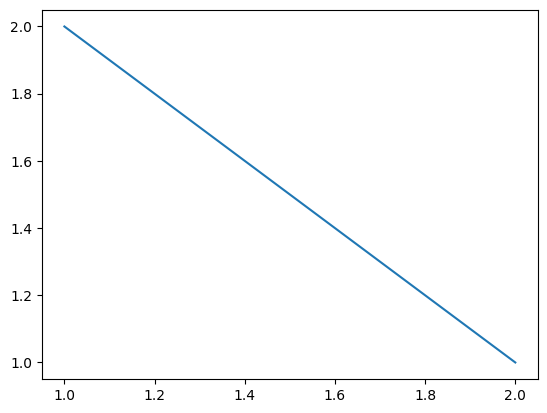

In [102]:
plot([1,2], [2,1])

In [103]:
result.keys()

dict_keys(['<start>', '<arith_expr>', '<function>', '<number>', '<maybe_minus>', '<onenine>', '<digit>', '<maybe_digits>', '<digits>', '<maybe_frac>'])

In [104]:
from copy import deepcopy
g = deepcopy(result)

features = set()

for rule in g:
    for child in g[rule]:
        features.add(f"{rule}->{child[1]['prob']}")

In [105]:
display(features)

{'<arith_expr>->None',
 '<digit>->0.0',
 '<digit>->0.023809523809523808',
 '<digit>->0.047619047619047616',
 '<digit>->0.07142857142857142',
 '<digit>->0.11904761904761904',
 '<digit>->0.14285714285714285',
 '<digit>->0.16666666666666666',
 '<digit>->0.19047619047619047',
 '<digits>->0.23809523809523808',
 '<digits>->0.7619047619047619',
 '<function>->0.0',
 '<function>->1.0',
 '<maybe_digits>->0.490463775307651',
 '<maybe_digits>->0.5095362246923489',
 '<maybe_frac>->0.0',
 '<maybe_frac>->1.0',
 '<maybe_minus>->0.0',
 '<maybe_minus>->1.0',
 '<number>->None',
 '<onenine>->0.0',
 '<onenine>->0.4',
 '<onenine>->0.6',
 '<start>->None'}

In [106]:
gr = [g, g]

def _initialize(g):
    g = deepcopy(g)
    probabilities = dict()
    for rule in g:
        for child in g[rule]:
            feature = f"{rule}->{child[0]}"
            probabilities[feature] = []
    return probabilities



def parse_prob_grammars(grammar_list):
    probabilities = _initialize(grammar_list[0])

    for grammar in grammar_list:
        for rule in grammar:
            for child in grammar[rule]:
                feature = f"{rule}->{child[0]}"
                prob_list = probabilities[feature]
                if child[1]['prob'] is None:
                    prob_list.append(1.0)
                else:
                    prob_list.append(child[1]['prob'])
                probabilities[feature] = prob_list

    return probabilities


r = parse_prob_grammars(gr)

In [107]:
display(r)

{'<start>-><arith_expr>': [1.0, 1.0],
 '<arith_expr>-><function>(<number>)': [1.0, 1.0],
 '<function>->sqrt': [1.0, 1.0],
 '<function>->sin': [0.0, 0.0],
 '<function>->cos': [0.0, 0.0],
 '<function>->tan': [0.0, 0.0],
 '<number>-><maybe_minus><onenine><maybe_digits><maybe_frac>': [1.0, 1.0],
 '<maybe_minus>->': [0.0, 0.0],
 '<maybe_minus>->-': [1.0, 1.0],
 '<onenine>->1': [0.0, 0.0],
 '<onenine>->2': [0.4, 0.4],
 '<onenine>->3': [0.0, 0.0],
 '<onenine>->4': [0.0, 0.0],
 '<onenine>->5': [0.6, 0.6],
 '<onenine>->6': [0.0, 0.0],
 '<onenine>->7': [0.0, 0.0],
 '<onenine>->8': [0.0, 0.0],
 '<onenine>->9': [0.0, 0.0],
 '<digit>->0': [0.07142857142857142, 0.07142857142857142],
 '<digit>->1': [0.11904761904761904, 0.11904761904761904],
 '<digit>->2': [0.023809523809523808, 0.023809523809523808],
 '<digit>->3': [0.14285714285714285, 0.14285714285714285],
 '<digit>->4': [0.19047619047619047, 0.19047619047619047],
 '<digit>->5': [0.047619047619047616, 0.047619047619047616],
 '<digit>->6': [0.0, 0.

In [108]:
all_prob_grammars_org = evogfuzz._probabilistic_grammars
all_prob_grammars = [g[0] for g in all_prob_grammars_org]

In [109]:
# all_prob_grammars = [g[0] for g in all_prob_grammars]

In [110]:
r = parse_prob_grammars(all_prob_grammars)

In [111]:
display(r)

{'<start>-><arith_expr>': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<arith_expr>-><function>(<number>)': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<function>->sqrt': [0.5,
  0.6,
  0.6,
  0.6,
  0.6,
  0.7,
  0.7,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<function>->sin': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '<function>->cos': [0.25,
  0.3,
  0.3,
  0.4,
  0.4,
  0.3,
  0.3,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '<function>->tan': [0.25,
  0.1,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [112]:
from evogfuzz.evogfuzz_class import GrammarType
reduced = list(filter(lambda x: x[1] == GrammarType.LEARNED or GrammarType.MUTATED, all_prob_grammars_org))
reduced = [g[0] for g in reduced]
print(len(reduced))
dicts = parse_prob_grammars(reduced)

21


In [113]:
display(dicts)

{'<start>-><arith_expr>': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<arith_expr>-><function>(<number>)': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<function>->sqrt': [0.5,
  0.6,
  0.6,
  0.6,
  0.6,
  0.7,
  0.7,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<function>->sin': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '<function>->cos': [0.25,
  0.3,
  0.3,
  0.4,
  0.4,
  0.3,
  0.3,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '<function>->tan': [0.25,
  0.1,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

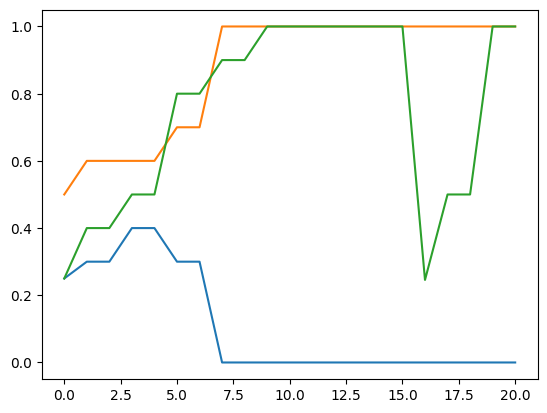

In [114]:
import matplotlib.pyplot as plt

xvals = [i for i in range(len(reduced))]

f, ax = plt.subplots(1)

feature_disp = ['<function>->cos', '<function>->sqrt', '<maybe_minus>->-']

for feature in feature_disp:
    ax.plot(xvals, dicts[feature])


In [115]:
display(evogfuzz._probabilistic_grammars)

[({'<start>': [('<arith_expr>', {'prob': None})],
   '<arith_expr>': [('<function>(<number>)', {'prob': None})],
   '<function>': [('sqrt', {'prob': 0.5}),
    ('sin', {'prob': 0.0}),
    ('cos', {'prob': 0.25}),
    ('tan', {'prob': 0.25})],
   '<number>': [('<maybe_minus><onenine><maybe_digits><maybe_frac>',
     {'prob': None})],
   '<maybe_minus>': [('', {'prob': 0.75}), ('-', {'prob': 0.25})],
   '<onenine>': [('1', {'prob': 0.5}),
    ('2', {'prob': 0.25}),
    ('3', {'prob': 0.25}),
    ('4', {'prob': 0.0}),
    ('5', {'prob': 0.0}),
    ('6', {'prob': 0.0}),
    ('7', {'prob': 0.0}),
    ('8', {'prob': 0.0}),
    ('9', {'prob': 0.0})],
   '<digit>': [('0', {'prob': 0.16666666666666666}),
    ('1', {'prob': 0.0}),
    ('2', {'prob': 0.16666666666666666}),
    ('3', {'prob': 0.16666666666666666}),
    ('4', {'prob': 0.0}),
    ('5', {'prob': 0.0}),
    ('6', {'prob': 0.16666666666666666}),
    ('7', {'prob': 0.16666666666666666}),
    ('8', {'prob': 0.16666666666666666}),
    ('9

### Plot Fitness Values

In [116]:
fitness_values = [(x[2],x[1]) for x in all_prob_grammars_org[:]]
print("Original")
display(fitness_values)


from typing import Tuple, List

def clean_fitness_values(fitness_values: List[Tuple[int, GrammarType]]):
    for index, it in enumerate(fitness_values):
        if it[0] == -1:
            fitness_values[index] = (fitness_values[index-1][0], it[1])

    return fitness_values

res = clean_fitness_values(fitness_values)
print("Clean")
display(res)

Original


[(3, <GrammarType.LEARNED: 'learned'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (4, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (7, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (9, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (5, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (-1, <GrammarType.MUTATED: 'mutated'>)]

Clean


[(3, <GrammarType.LEARNED: 'learned'>),
 (3, <GrammarType.LEARNED: 'learned'>),
 (4, <GrammarType.MUTATED: 'mutated'>),
 (4, <GrammarType.LEARNED: 'learned'>),
 (7, <GrammarType.MUTATED: 'mutated'>),
 (7, <GrammarType.LEARNED: 'learned'>),
 (9, <GrammarType.MUTATED: 'mutated'>),
 (9, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (5, <GrammarType.MUTATED: 'mutated'>),
 (5, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>)]

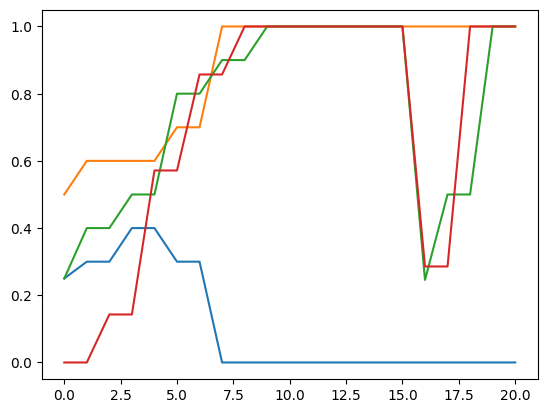

In [117]:
import matplotlib.pyplot as plt

xvals = [i for i in range(len(reduced))]

f, ax = plt.subplots(1)

feature_disp = ['<function>->cos', '<function>->sqrt', '<maybe_minus>->-']
# feature_disp = dicts.keys()

for feature in feature_disp:
    ax.plot(xvals, dicts[feature])

xvals = [i for i in range(len(res))]
yvals = [i[0] for i in res]

import numpy as np

def normalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

p = normalizeData(yvals)

ax.plot(xvals, p)

In [118]:
data = zip({1,2,3}, [False,False,False])

In [119]:
from fuzzingbook.ProbabilisticGrammarFuzzer import ProbabilisticGrammarMiner
from fuzzingbook.Parser import EarleyParser
from copy import deepcopy

new_g = deepcopy(GRAMMAR)
new_g['<maybe_minus>'] = ['', '-']

probabilistic_grammar_miner = ProbabilisticGrammarMiner(EarleyParser(new_g), log=True)
probabilistic_grammar = probabilistic_grammar_miner.mine_probabilistic_grammar(['sqrt(12)', 'tan(-1)'])

Found <start> -> <arith_expr>
Found <arith_expr> -> <function>(<number>)
Found <function> -> sqrt
Found <number> -> <maybe_minus><onenine><maybe_digits><maybe_frac>
Found <maybe_minus> -> 
Found <onenine> -> 1
Found <maybe_digits> -> <digits>
Found <digits> -> <digit>
Found <digit> -> 2
Found <maybe_frac> -> 
Found <start> -> <arith_expr>
Found <arith_expr> -> <function>(<number>)
Found <function> -> tan
Found <number> -> <maybe_minus><onenine><maybe_digits><maybe_frac>
Found <maybe_minus> -> -
Found <onenine> -> 1
Found <maybe_digits> -> 
Found <maybe_frac> -> 
['sqrt', 'sin', 'cos', 'tan']
{'<start> -> <arith_expr>': 2, '<arith_expr> -> <function>(<number>)': 2, '<function> -> sqrt': 1, '<number> -> <maybe_minus><onenine><maybe_digits><maybe_frac>': 2, '<maybe_minus> -> ': 1, '<onenine> -> 1': 2, '<maybe_digits> -> <digits>': 1, '<digits> -> <digit>': 1, '<digit> -> 2': 1, '<maybe_frac> -> ': 2, '<function> -> tan': 1, '<maybe_minus> -> -': 1, '<maybe_digits> -> ': 1}
['sqrt', 'sin',

In [120]:
display(probabilistic_grammar)

{'<start>': [('<arith_expr>', {'prob': None})],
 '<arith_expr>': [('<function>(<number>)', {'prob': None})],
 '<function>': [('sqrt', {'prob': 0.5}),
  ('sin', {'prob': 0.0}),
  ('cos', {'prob': 0.0}),
  ('tan', {'prob': 0.5})],
 '<number>': [('<maybe_minus><onenine><maybe_digits><maybe_frac>',
   {'prob': None})],
 '<maybe_minus>': [('', {'prob': 0.5}), ('-', {'prob': 0.5})],
 '<onenine>': [('1', {'prob': 1.0}),
  ('2', {'prob': 0.0}),
  ('3', {'prob': 0.0}),
  ('4', {'prob': 0.0}),
  ('5', {'prob': 0.0}),
  ('6', {'prob': 0.0}),
  ('7', {'prob': 0.0}),
  ('8', {'prob': 0.0}),
  ('9', {'prob': 0.0})],
 '<digit>': [('0', {'prob': 0.0}),
  ('1', {'prob': 0.0}),
  ('2', {'prob': 1.0}),
  ('3', {'prob': 0.0}),
  ('4', {'prob': 0.0}),
  ('5', {'prob': 0.0}),
  ('6', {'prob': 0.0}),
  ('7', {'prob': 0.0}),
  ('8', {'prob': 0.0}),
  ('9', {'prob': 0.0})],
 '<maybe_digits>': [('', {'prob': 0.5}), ('<digits>', {'prob': 0.5})],
 '<digits>': [('<digit>', {'prob': 1.0}), ('<digit><digits>', {'pro

In [121]:
p = EarleyParser(GRAMMAR)
for t in p.parse('sqrt(10)'):
    print(t)

('<start>', [('<arith_expr>', [('<function>', [('sqrt', [])]), ('(', []), ('<number>', [('<maybe_minus>', []), ('<onenine>', [('1', [])]), ('<maybe_digits>', [('<digits>', [('<digit>', [('0', [])])])]), ('<maybe_frac>', [])]), (')', [])])])


In [122]:
x = []
type(len(x))

int